<h1>Regression Metrics</h1>

1.) MAE
<br/>
2.) MSE
<br/>
3.) RMSE
<br/>
4.) R2 Score
<br/>
5.) Adjusted R2 score


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package (in LPA)')

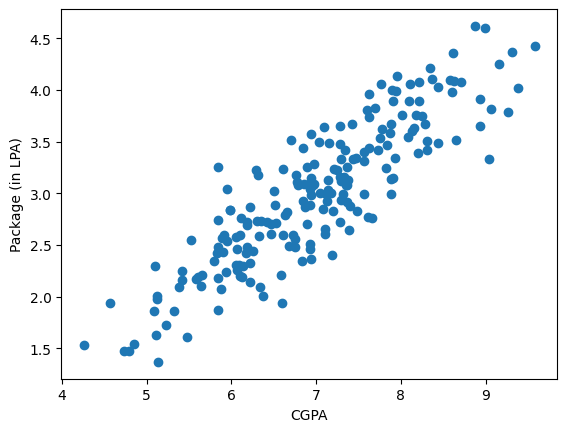

In [4]:
plt.scatter(df['cgpa'] , df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')

In [15]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x, y , test_size=0.2 , random_state=42)

In [17]:
Y_train.shape

(160,)

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(X_test)

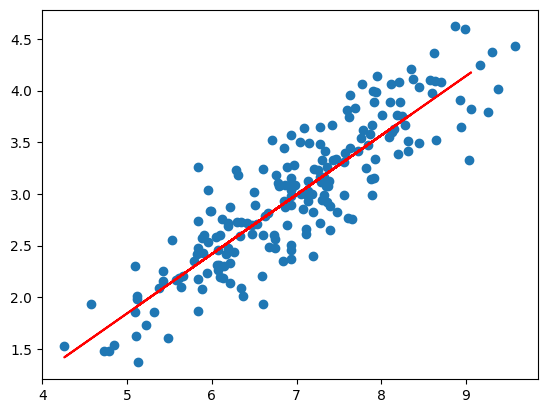

In [20]:
plt.scatter(df['cgpa'] , df['package'])
plt.plot(X_test,y_pred , color='red')

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [22]:
y_pred

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

In [24]:
Y_test.values

array([2.79, 3.23, 3.26, 3.04, 3.34, 4.21, 2.94, 2.87, 2.99, 3.58, 1.63,
       2.08, 4.08, 2.21, 3.47, 3.64, 2.74, 3.08, 2.17, 2.99, 2.31, 2.35,
       3.4 , 3.08, 3.81, 2.19, 1.53, 2.89, 3.16, 2.48, 3.51, 2.98, 3.39,
       3.28, 2.73, 3.74, 2.6 , 3.13, 3.82, 3.15])

In [27]:
print("MAE : ", mean_absolute_error(Y_test,y_pred))

MAE :  0.23150985393278373


In [28]:
print("MSE : ", mean_squared_error(Y_test,y_pred))

MSE :  0.08417638361329656


In [29]:
print("RMSE : ", np.sqrt(mean_squared_error(Y_test,y_pred)))

RMSE :  0.2901316659954521


In [31]:
print("R2 score : ", r2_score(Y_test,y_pred))
r2 = r2_score(Y_test,y_pred)

R2 score :  0.7730984312051673


In [32]:
Y_test.shape

(40,)

In [33]:
# Adjusted R2 score
1 - ((1-r2)*(40-1)/(40-1-1))

0.7671273372895138

In [34]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa' , 'random_feature' , 'package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.149242,3.26
1,5.12,0.616094,1.98
2,7.82,0.334268,3.25
3,7.42,0.343555,3.67
4,6.94,0.382004,3.57


Text(0, 0.5, 'Package (in LPA)')

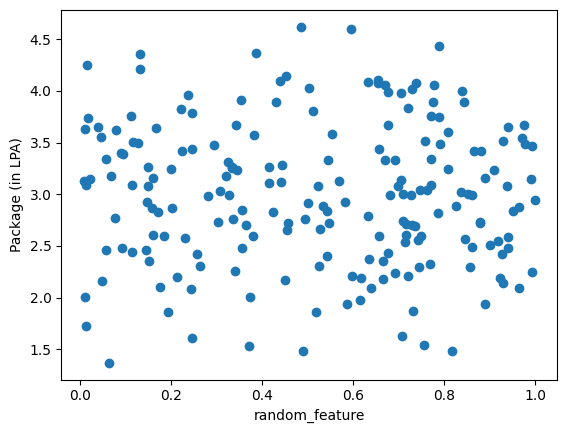

In [35]:
plt.scatter(new_df1['random_feature'] , new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package (in LPA)')

In [36]:
x = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x, y , test_size=0.2 , random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [39]:
y_pred = lr.predict(X_test)

In [40]:
print("R2 score : ", r2_score(Y_test,y_pred))
r2 = r2_score(Y_test,y_pred)

R2 score :  0.7734403732785311


In [41]:
# Adjusted R2 score = 1 - [(1-r2)*(n-1) / (n-1-k)]
1 - ((1-r2)*(40-1)/(40-1-2))

0.7611939069692626